Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 019
Code Title: | Emerging Technologies in CpE 2
Summer | AY 2024 - 2025
<hr> | <hr>
<u>**Hands-on Activity 8.1**</u> | <u>**Saving Models**</u>
**Name** | Calvadores, Kelly Joseph
**Section** | CPE32S1
**Date Performed**: | July 01, 2024
**Date Submitted**: | July 05, 2024
**Instructor**: | Engr. Roman M. Richard

<hr>

#Choose any dataset applicable to either a classification problem or a regression problem.

#Explain your datasets and the problem being addressed.

- The problem that is currently being addressed is to build a model that can classify the different types of glass based on the given Dataset.

#Show evidence that you can do the following:

In [18]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.callbacks import ModelCheckpoint
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
import os

Resource: https://archive.ics.uci.edu/dataset/42/glass+identification

In [19]:
ColumnNames = ['Id_number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type_of_glass']
Data = pd.read_csv('/content/drive/MyDrive/CPE 019 (Retake)/HOA 8.1/glass.data', header=None)
Data.columns = ColumnNames
Data.to_csv('/content/drive/MyDrive/CPE 019 (Retake)/HOA 8.1/glass_data_with_header.csv', index=False)
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id_number      214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type_of_glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [20]:
Data

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [21]:
X= Data.iloc[:, :-1]
y = Data.iloc[:, -1]

In [22]:
SS = StandardScaler()
X = SS.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.001, random_state=123)

LE = LabelEncoder()
y_train = LE.fit_transform(y_train)
y_test = LE.fit_transform(y_test)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [23]:
Model = Sequential()
Model.add(Dense(16, input_dim=10, activation='relu'))
Model.add(Dense(8, activation='relu'))
Model.add(Dense(6, activation='sigmoid'))

In [24]:
Model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
Model.fit(X_train, y_train, epochs=150, batch_size=1000, verbose = 0)
Result = Model.evaluate(X_train, y_train)
print("%s: %.2f%%" % (Model.metrics_names[1], Result[1]*100))

7/7 [==============================] - 0s 4ms/step - loss: 0.7395 - accuracy: 0.7934
accuracy: 79.34%


**Observation:**
When the first run on this model, the result is below 35%, but when I did some scaling and splitting data, it rose to 79%, both accuracy and loss has little difference of 6%

##Save a model and load the model in a JSON format

In [25]:
Model_json = Model.to_json()
with open("/content/drive/MyDrive/CPE 019 (Retake)/HOA 8.1/Models/Model.json", "w") as json_file:
    json_file.write(Model_json)
    print("Saved model to disk")

Saved model to disk


In [26]:
Model.save_weights("/content/drive/MyDrive/CPE 019 (Retake)/HOA 8.1/Models/Model.h5")
print("Saved model to disk")

Saved model to disk


In [28]:
from tensorflow.keras.models import Sequential, model_from_json
json_file = open('/content/drive/MyDrive/CPE 019 (Retake)/HOA 8.1/Models/Model.json', 'r')
Loaded_model_json = json_file.read()
json_file.close()
Loaded_model = model_from_json(Loaded_model_json)
Loaded_model.load_weights("/content/drive/MyDrive/CPE 019 (Retake)/HOA 8.1/Models/Model.h5")
print("Loaded model from disk")

Loaded model from disk


In [29]:
Loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
Result = Loaded_model.evaluate(X_train, y_train, verbose = 0)
print("%s: %.2f%%" % (Loaded_model.metrics_names[1], Result[1]*100))

accuracy: 79.34%


**Observation:**
In this part of code, saving and loading model is an amazing thing when creating a project, when loading the model, same accuracy was made.

##Save a model and load the model in a YAML format

In [30]:
from tensorflow.keras.models import Sequential, model_from_yaml
Model_yaml = Model.to_json()
with open("/content/drive/MyDrive/CPE 019 (Retake)/HOA 8.1/Models/Model.yaml", "w") as yaml_file:
    yaml_file.write(Model_yaml)
Model.save_weights("/content/drive/MyDrive/CPE 019 (Retake)/HOA 8.1/Models/Model_yaml.h5")
print("Saved model to disk")

Saved model to disk


In [31]:
yaml_file = open('/content/drive/MyDrive/CPE 019 (Retake)/HOA 8.1/Models/Model.yaml', 'r')
Loaded_model_yaml = yaml_file.read()
yaml_file.close()
Loaded_model = model_from_json(Loaded_model_yaml)
Loaded_model.load_weights("/content/drive/MyDrive/CPE 019 (Retake)/HOA 8.1/Models/Model_yaml.h5")
print("Loaded model from disk")
Loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
Result = Loaded_model.evaluate(X_train, y_train, verbose = 0)
print("%s: %.2f%%" % (Loaded_model.metrics_names[1], Result[1]*100))

Loaded model from disk
accuracy: 79.34%


**Observation:**
The yaml file is almost same process as json file except .yaml is used, when is serch it, it was because yaml module is not installed in this google colab

##Checkpoint Neural Network Model Improvements


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.callbacks import ModelCheckpoint
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

tf.random.set_seed(42)
Data = pd.read_csv('/content/drive/MyDrive/CPE 019 (Retake)/HOA 8.1/glass_data_with_header.csv')
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id_number      214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type_of_glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [ ]:
X = Data.iloc[:, :-1]
y = Data.iloc[:, -1]

SS = StandardScaler()
X = SS.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

LE = LabelEncoder()
y_train = LE.fit_transform(y_train)
y_test = LE.fit_transform(y_test)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Model = Sequential()
Model.add(Dense(64, input_dim=10, activation='relu'))
Model.add(Dense(32, activation='relu'))
Model.add(Dense(6, activation='softmax'))

Model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
Filepath = "/content/drive/MyDrive/CPE 019 (Retake)/HOA 8.1/Improve save model/weights-improvement-{epoch:02d}-{val_accuracy:.2f}.keras"
CheckPoint = ModelCheckpoint(filepath=Filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
Callbacks_list = [CheckPoint]

Model.fit(X_train, y_train, validation_split=0.33, epochs=150, batch_size=1000, callbacks=Callbacks_list, verbose=0)


Epoch 1: val_accuracy improved from -inf to 0.20833, saving model to /content/drive/MyDrive/CPE 019 (Retake)/HOA 8.1/Improve save model/weights-improvement-01-0.21.keras

Epoch 2: val_accuracy improved from 0.20833 to 0.25000, saving model to /content/drive/MyDrive/CPE 019 (Retake)/HOA 8.1/Improve save model/weights-improvement-02-0.25.keras

Epoch 3: val_accuracy improved from 0.25000 to 0.27083, saving model to /content/drive/MyDrive/CPE 019 (Retake)/HOA 8.1/Improve save model/weights-improvement-03-0.27.keras

Epoch 4: val_accuracy improved from 0.27083 to 0.31250, saving model to /content/drive/MyDrive/CPE 019 (Retake)/HOA 8.1/Improve save model/weights-improvement-04-0.31.keras

Epoch 5: val_accuracy improved from 0.31250 to 0.37500, saving model to /content/drive/MyDrive/CPE 019 (Retake)/HOA 8.1/Improve save model/weights-improvement-05-0.38.keras

Epoch 6: val_accuracy improved from 0.37500 to 0.39583, saving model to /content/drive/MyDrive/CPE 019 (Retake)/HOA 8.1/Improve save

**Observed:**
In this part of code, there is a certain part that is only saved not all of them, that is because the it only save the improvement of the model which is great when collecting good model.

##Checkpoint Best Neural Network Model only

In [ ]:
Model = Sequential()
Model.add(Dense(64, input_dim=10, activation='relu'))
Model.add(Dense(32, activation='relu'))
Model.add(Dense(6, activation='softmax'))

Model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
Filepath = "/content/drive/MyDrive/CPE 019 (Retake)/HOA 8.1/Save Best  Model/weights.best.keras"
CheckPoint = ModelCheckpoint(filepath=Filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
Callbacks_list = [CheckPoint]
Model.fit(X_train, y_train, validation_split=0.33, epochs=150, batch_size=1000, callbacks=Callbacks_list, verbose=0)


Epoch 1: val_accuracy improved from -inf to 0.10417, saving model to /content/drive/MyDrive/CPE 019 (Retake)/HOA 8.1/Save Best  Model/weights.best.keras

Epoch 2: val_accuracy improved from 0.10417 to 0.14583, saving model to /content/drive/MyDrive/CPE 019 (Retake)/HOA 8.1/Save Best  Model/weights.best.keras

Epoch 3: val_accuracy improved from 0.14583 to 0.16667, saving model to /content/drive/MyDrive/CPE 019 (Retake)/HOA 8.1/Save Best  Model/weights.best.keras

Epoch 4: val_accuracy improved from 0.16667 to 0.18750, saving model to /content/drive/MyDrive/CPE 019 (Retake)/HOA 8.1/Save Best  Model/weights.best.keras

Epoch 5: val_accuracy improved from 0.18750 to 0.25000, saving model to /content/drive/MyDrive/CPE 019 (Retake)/HOA 8.1/Save Best  Model/weights.best.keras

Epoch 6: val_accuracy did not improve from 0.25000

Epoch 7: val_accuracy improved from 0.25000 to 0.29167, saving model to /content/drive/MyDrive/CPE 019 (Retake)/HOA 8.1/Save Best  Model/weights.best.keras

Epoch 8:

**Observation:**
In this part of code, it does the same thing as the code above, the only different is that it replace or being overlaid the previous improvement and save the best model that is being recorded

##Load a saved Neural Network model

In [ ]:
Model = Sequential()
Model.add(Dense(64, input_dim=10, activation='relu'))
Model.add(Dense(32, activation='relu'))
Model.add(Dense(6, activation='softmax'))

Model.load_weights("/content/drive/MyDrive/CPE 019 (Retake)/HOA 8.1/Save Best  Model/weights.best.keras")
Model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print("Created model weights from file")and loaded

Created model weights from file


In [ ]:
Result = Model.evaluate(X_train, y_train, verbose = 0)
print("%s: %.2f%%" % (Model.metrics_names[1], Result[1]*100))

compile_metrics: 89.51%


##Visualize Model Training History in Keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.callbacks import ModelCheckpoint
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

Data = pd.read_csv('/content/drive/MyDrive/CPE 019 (Retake)/HOA 8.1/glass_data_with_header.csv')
Data

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
X = Data.iloc[:, :-1]
y = Data.iloc[:, -1]

SS = StandardScaler()
X = SS.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

LE = LabelEncoder()
y_train = LE.fit_transform(y_train)
y_test = LE.fit_transform(y_test)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
Model = Sequential()
Model.add(Dense(32, input_dim=10, activation='relu'))
Model.add(Dense(16, activation='relu'))
Model.add(Dense(6, activation='softmax'))

Model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = Model.fit(X_train, y_train, validation_split=0.33, epochs=150, batch_size=1000, verbose=0)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


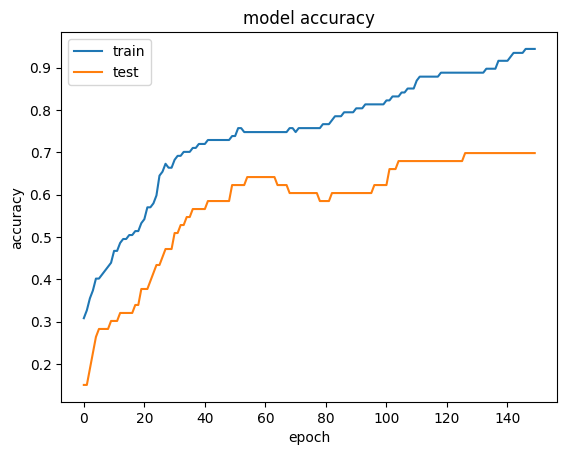

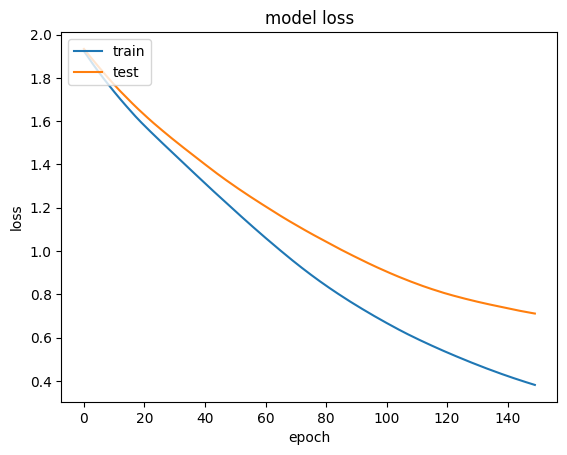

In [ ]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Observation:**
As seen in the plot, there is still a gap between 2 plots, the train and test is going great but not enough due the gap of the Train and test is still creating gap by time.

##Show the application of Dropout Regularization

In [ ]:
!pip install scikeras

In [ ]:
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dropout
from tensorflow.keras.constraints import MaxNorm
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

Data = read_csv('/content/drive/MyDrive/CPE 019 (Retake)/HOA 8.1/glass_data_with_header.csv')
Data

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
X = Data.iloc[:, :-1]
y = Data.iloc[:, -1]

SS = StandardScaler()
X = SS.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

X = X_train
y = y_train

LE = LabelEncoder()
y = LE.fit_transform(y)

In [ ]:
def create_baseline():
    model = Sequential()
    model.add(Dense(64, input_shape=(10,), activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    sgd = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

In [ ]:
Estimators = []
Estimators.append(('standardize', StandardScaler()))
Estimators.append(('mlp', KerasClassifier(model = create_baseline, epochs=300, batch_size=1000, verbose=0)))
pipeline = Pipeline(Estimators)
Kfold = StratifiedKFold(n_splits=10, shuffle=True)
Results = cross_val_score(pipeline, X, y, cv=Kfold)
print("Baseline: %.2f%% (%.2f%%)" % (Results.mean()*100, Results.std()*100))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a lay

Baseline: 36.25% (2.50%)


**Observation:**
In this part of the code, the use of Dropout Regularzation is good thing when preprocessing data, because not only reducing the chances or reducing of being overfitting, it is also avoiding removing data that might contain some important part.

##Show the application of Dropout on the visible layer


In [ ]:
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dropout
from tensorflow.keras.constraints import MaxNorm
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

Data = read_csv('/content/drive/MyDrive/CPE 019 (Retake)/HOA 8.1/glass_data_with_header.csv')
Data

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
X = Data.iloc[:, :-1]
y = Data.iloc[:, -1]

SS = StandardScaler()
X = SS.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

LE = LabelEncoder()
y_train = LE.fit_transform(y_train)
#y_test = LE.fit_transform(y)

In [ ]:
print(X_train.shape)
print(y_train)

(160, 10)
[0 0 1 1 4 0 5 3 0 0 2 0 1 3 1 4 2 5 3 1 1 0 3 1 5 0 0 0 0 5 1 1 0 4 3 1 0
 0 0 5 1 1 0 0 0 1 0 2 0 0 2 0 1 1 0 0 2 4 0 1 4 1 1 0 5 0 0 0 1 2 1 5 4 2
 1 0 0 1 1 5 2 0 0 1 2 0 1 0 0 0 0 5 0 0 1 0 1 1 0 1 1 5 1 3 0 2 0 1 0 2 1
 0 0 5 1 3 1 0 2 1 1 1 1 1 1 1 1 1 4 5 5 5 0 1 0 0 0 0 5 3 1 5 2 1 3 0 1 0
 5 1 1 0 1 1 1 0 1 0 1 1]


In [ ]:
def create_baseline():
    model = Sequential()
    model.add(Dropout(0.5, input_shape = (10,)))
    model.add(Dense(32, activation='relu', kernel_constraint = MaxNorm(3)))
    model.add(Dense(16, activation='relu', kernel_constraint = MaxNorm(3)))
    model.add(Dense(1, activation='sigmoid'))
    sgd = SGD(learning_rate=0.1, momentum=0.9)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

In [ ]:
Estimators = []
Estimators.append(('standardize', StandardScaler()))
Estimators.append(('mlp', KerasClassifier(model = create_baseline, epochs=150, batch_size=50, verbose=0)))
pipeline = Pipeline(Estimators)
Kfold = StratifiedKFold(n_splits=10, shuffle=True)
RResults = cross_val_score(pipeline, X_train, y_train, cv=Kfold)
print("Visible: %.2f%% (%.2f%%)" % (RResults.mean()*100, RResults.std()*100))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/dropout.py:42: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/dropout.py:42: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/dropout.py:42: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an 

Visible: 36.25% (2.50%)


In [ ]:
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dropout
from tensorflow.keras.constraints import MaxNorm
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

Data = read_csv('/content/drive/MyDrive/CPE 019 (Retake)/HOA 8.1/glass_data_with_header.csv')
Data

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
X = Data.iloc[:, :-1]
y = Data.iloc[:, -1]

SS = StandardScaler()
X = SS.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

LE = LabelEncoder()
y_encoded = LE.fit_transform(y_train)
#y_test = LE.fit_transform(y)

In [ ]:
def create_baseline():
    model = Sequential()
    model.add(Dense(32, input_shape = (10,), activation = 'relu', kernel_constraint = MaxNorm(3)))
    model.add(Dropout(0.5))
    model.add(Dense(16, activation='relu', kernel_constraint = MaxNorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    sgd = SGD(learning_rate=0.0001, momentum=0.8)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

In [ ]:
Estimators = []
Estimators.append(('standardize', StandardScaler()))
Estimators.append(('mlp', KerasClassifier(model = create_baseline, epochs=300, batch_size=50, verbose=0)))
pipeline = Pipeline(Estimators)
Kfold = StratifiedKFold(n_splits=10, shuffle=True)
HResults = cross_val_score(pipeline, X_train, y_encoded, cv=Kfold)
print("Hidden: %.2f%% (%.2f%%)" % (HResults.mean()*100, HResults.std()*100))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a lay

Hidden: 36.25% (2.50%)


**Observation:**
In this part of the code, both Visible and Hidden layer has the same percentages, although the process is different.

##Show the application of a time-based learning rate schedule

In [ ]:
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# tf.keras.optimizers.legacy.SGD
from tensorflow.keras.optimizers.legacy import SGD
from sklearn.preprocessing import LabelEncoder

In [ ]:
Data = read_csv('/content/drive/MyDrive/CPE 019 (Retake)/HOA 8.1/glass_data_with_header.csv')
Data

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
Dataset = Data.values
Dataset

array([[  1.     ,   1.52101,  13.64   , ...,   0.     ,   0.     ,
          1.     ],
       [  2.     ,   1.51761,  13.89   , ...,   0.     ,   0.     ,
          1.     ],
       [  3.     ,   1.51618,  13.53   , ...,   0.     ,   0.     ,
          1.     ],
       ...,
       [212.     ,   1.52065,  14.36   , ...,   1.64   ,   0.     ,
          7.     ],
       [213.     ,   1.51651,  14.38   , ...,   1.57   ,   0.     ,
          7.     ],
       [214.     ,   1.51711,  14.23   , ...,   1.67   ,   0.     ,
          7.     ]])

In [ ]:
X = Dataset[:, :-1]
y = Dataset[:, -1]

In [ ]:
LE = LabelEncoder()
y = LE.fit_transform(y)

In [ ]:
Model = Sequential()
Model.add(Dense(32, input_shape = (10,), activation='relu'))
Model.add(Dense(16, activation='relu'))
Model.add(Dense(1, activation='sigmoid'))

Epochs = 150
learning_rate = 0.1
decay_rate = learning_rate / Epochs
momentum = 0.8
sgd = SGD(learning_rate=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
Model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

Model.fit(X, y, validation_split = 0.33, epochs=Epochs, batch_size=500, verbose=2)

Epoch 1/150
1/1 - 2s - loss: 0.3530 - accuracy: 0.8322 - val_loss: 617.8101 - val_accuracy: 0.0000e+00 - 2s/epoch - 2s/step
Epoch 2/150
1/1 - 0s - loss: 65.6476 - accuracy: 0.4895 - val_loss: 148.8981 - val_accuracy: 0.0000e+00 - 180ms/epoch - 180ms/step
Epoch 3/150
1/1 - 0s - loss: 13.0404 - accuracy: 0.4476 - val_loss: -4.4593e+04 - val_accuracy: 0.0423 - 78ms/epoch - 78ms/step
Epoch 4/150
1/1 - 0s - loss: 2506.6309 - accuracy: 0.5105 - val_loss: -1.1996e+04 - val_accuracy: 0.0423 - 103ms/epoch - 103ms/step
Epoch 5/150
1/1 - 0s - loss: 1313.3936 - accuracy: 0.5105 - val_loss: 51139.6758 - val_accuracy: 0.0000e+00 - 70ms/epoch - 70ms/step
Epoch 6/150
1/1 - 0s - loss: 5660.3306 - accuracy: 0.4895 - val_loss: -4.4740e+01 - val_accuracy: 0.0423 - 103ms/epoch - 103ms/step
Epoch 7/150
1/1 - 0s - loss: 8.3599 - accuracy: 0.5105 - val_loss: 0.5548 - val_accuracy: 0.0423 - 83ms/epoch - 83ms/step
Epoch 8/150
1/1 - 0s - loss: 0.6929 - accuracy: 0.5105 - val_loss: 0.6717 - val_accuracy: 0.0423 -

##Show the application of a drop-based learning rate schedule

In [ ]:
from pandas import read_csv
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers.legacy import SGD
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import LearningRateScheduler

In [ ]:
Data = read_csv('/content/drive/MyDrive/CPE 019 (Retake)/HOA 8.1/glass_data_with_header.csv')
Data

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
def step_decay(epoch):
    initial_lrate = 0.1
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

In [ ]:
Dataset = Data.values
X = Dataset[:, :-1]
y = Dataset[:, -1]
LE = LabelEncoder()
y = LE.fit_transform(y)

In [ ]:
Model = Sequential()
Model.add(Dense(32, input_shape = (10,), activation='relu'))
Model.add(Dense(1, activation='sigmoid'))


sgd = SGD(learning_rate = 0.0, momentum = 0.9)
Model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
lrate = LearningRateScheduler(step_decay)
callbacks_list = [lrate]

Model.fit(X, y, validation_split = 0.33, epochs=150, batch_size=500, callbacks = callbacks_list, verbose=2)

Epoch 1/150
1/1 - 1s - loss: 9.0685 - accuracy: 0.3846 - val_loss: -5.6592e+03 - val_accuracy: 0.0423 - lr: 0.1000 - 1s/epoch - 1s/step
Epoch 2/150
1/1 - 0s - loss: 357.2803 - accuracy: 0.5105 - val_loss: 7938.7246 - val_accuracy: 0.0000e+00 - lr: 0.1000 - 120ms/epoch - 120ms/step
Epoch 3/150
1/1 - 0s - loss: 694.6346 - accuracy: 0.4895 - val_loss: -4.8873e+01 - val_accuracy: 0.0423 - lr: 0.1000 - 170ms/epoch - 170ms/step
Epoch 4/150
1/1 - 0s - loss: 0.3765 - accuracy: 0.8531 - val_loss: -1.2058e+00 - val_accuracy: 0.0000e+00 - lr: 0.1000 - 188ms/epoch - 188ms/step
Epoch 5/150
1/1 - 0s - loss: 3.8208 - accuracy: 0.4895 - val_loss: -1.5414e+03 - val_accuracy: 0.0423 - lr: 0.1000 - 76ms/epoch - 76ms/step
Epoch 6/150
1/1 - 0s - loss: 52.6741 - accuracy: 0.5105 - val_loss: 0.1847 - val_accuracy: 0.0423 - lr: 0.1000 - 56ms/epoch - 56ms/step
Epoch 7/150
1/1 - 0s - loss: 0.6948 - accuracy: 0.5105 - val_loss: 0.1620 - val_accuracy: 0.0423 - lr: 0.1000 - 110ms/epoch - 110ms/step
Epoch 8/150
1/1

**Observation:**
In this part of the code, the time based and drop based, the two has almost has the same preocess but when it observed over time, it will shows different result, which for me the drop based is much better than time base due to being more effective learning rate adjustments.

#Conclusion

- In this activity, I was able to learned about how to save and load models, load checkpoints and manage to improve the model. I implement a time based and drop base learning rate and used the dropout regularization to reduce overfitting. With this activity, I will be able to improve my skills in regularization, optimization, and model management for the future projects.

In [ ]:
nbconvert --to html Model_yaml.ipynb